In [86]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be

In [9]:
# Descarga de datos
datos = pd.read_csv('b.csv')
datos.info()
    
# Descarga de datos
# ===================
datos['time'] = pd.to_datetime(datos['time'], format='%Y-%m-%d %H:%M:%S')
datos = datos.set_index('time')
datos = datos.asfreq('H')
datos = datos.sort_index()
datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35050 non-null  float64
 2   generation hydro pumped storage consumption  35062 non-null  float64
 3   generation hydro run-of-river and poundage   35062 non-null  float64
 4   generation hydro water reservoir             35063 non-null  float64
 5   generation nuclear                           35063 non-null  float64
 6   generation solar                             35063 non-null  float64
 7   generation waste                             35062 non-null  float64
 8   generation wind onshore                      35063 non-null  float64
 9   temp                                         35064 non-null  object 
 10

,generation biomass,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation solar,generation waste,generation wind onshore,temp,temp_min,temp_max,total load actual
time,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,863.0,1051.0,1899.0,7096.0,49.0,196.0,6378.0,"270.475,00",270.475,270.475,25385.0
2015-01-01 01:00:00+01:00,449.0,920.0,1009.0,1658.0,7096.0,50.0,195.0,5890.0,"270.475,00",270.475,270.475,24382.0
2015-01-01 02:00:00+01:00,448.0,1164.0,973.0,1371.0,7099.0,50.0,196.0,5461.0,"269.686,00",269.686,269.686,22734.0
2015-01-01 03:00:00+01:00,438.0,1503.0,949.0,779.0,7098.0,50.0,191.0,5238.0,"269.686,00",269.686,269.686,21286.0
2015-01-01 04:00:00+01:00,428.0,1826.0,953.0,720.0,7097.0,42.0,189.0,4935.0,"269.686,00",269.686,269.686,20264.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,1.0,1135.0,4836.0,6073.0,85.0,277.0,3113.0,282.14,281.15,283.15,30653.0
2018-12-31 20:00:00+01:00,296.0,1.0,1172.0,3931.0,6074.0,33.0,280.0,3288.0,282.15,282.15,282.15,29735.0
2018-12-31 21:00:00+01:00,292.0,50.0,1148.0,2831.0,6076.0,31.0,286.0,3503.0,284.15,284.15,284.15,28071.0


In [5]:
# Verificar que un índice temporal está completo
# ============================================
(datos.index == pd.date_range(start=datos.index.min(),
                              end=datos.index.max(),
                              freq=datos.index.freq)).all()

True

In [6]:
# Completar huecos en un índice temporal
# ==============================================================================
datos.asfreq(freq='60min', fill_value=np.nan)

,generation biomass,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation solar,generation waste,generation wind onshore,temp,temp_min,temp_max,total load actual
time,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,863.0,1051.0,1899.0,7096.0,49.0,196.0,6378.0,"270.475,00",270.475,270.475,25385.0
2015-01-01 01:00:00+01:00,449.0,920.0,1009.0,1658.0,7096.0,50.0,195.0,5890.0,"270.475,00",270.475,270.475,24382.0
2015-01-01 02:00:00+01:00,448.0,1164.0,973.0,1371.0,7099.0,50.0,196.0,5461.0,"269.686,00",269.686,269.686,22734.0
2015-01-01 03:00:00+01:00,438.0,1503.0,949.0,779.0,7098.0,50.0,191.0,5238.0,"269.686,00",269.686,269.686,21286.0
2015-01-01 04:00:00+01:00,428.0,1826.0,953.0,720.0,7097.0,42.0,189.0,4935.0,"269.686,00",269.686,269.686,20264.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,1.0,1135.0,4836.0,6073.0,85.0,277.0,3113.0,282.14,281.15,283.15,30653.0
2018-12-31 20:00:00+01:00,296.0,1.0,1172.0,3931.0,6074.0,33.0,280.0,3288.0,282.15,282.15,282.15,29735.0
2018-12-31 21:00:00+01:00,292.0,50.0,1148.0,2831.0,6076.0,31.0,286.0,3503.0,284.15,284.15,284.15,28071.0


In [7]:
# Separación datos train-val-test
# ==============================================================================
fin_train = '2017-12-31 23:59:00'
fin_validacion = '2018-7-31 23:59:00'
datos_train = datos.loc[: fin_train, :]
datos_val   = datos.loc[fin_train:fin_validacion, :]
datos_test  = datos.loc[fin_validacion:, :]

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")


Fechas train      : 2015-01-01 00:00:00+01:00 --- 2017-12-31 23:00:00+01:00  (n=26304)
Fechas validacion : 2018-01-01 00:00:00+01:00 --- 2018-07-31 23:00:00+01:00  (n=5088)
Fechas test       : 2018-08-01 00:00:00+01:00 --- 2018-12-31 23:00:00+01:00  (n=3672)


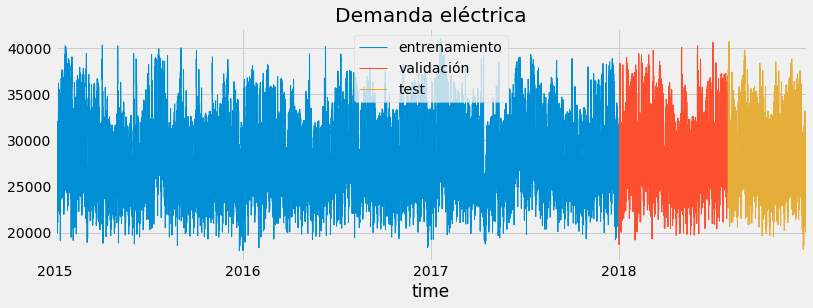

In [8]:
# Gráfico serie temporal
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
datos_train['total load actual'].plot(ax=ax, label='entrenamiento', linewidth=1)
datos_val['total load actual'].plot(ax=ax, label='validación', linewidth=1)
datos_test['total load actual'].plot(ax=ax, label='test', linewidth=1)
ax.set_title('Demanda eléctrica')
ax.legend();

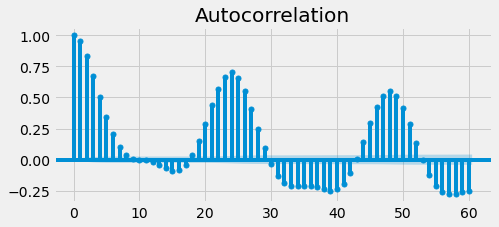

In [9]:
# Gráfico autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(datos['total load actual'], ax=ax, lags=60)
plt.show()

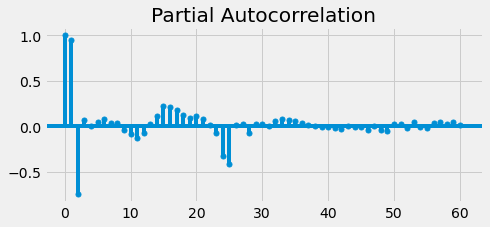

In [10]:
# Gráfico autocorrelación parcial
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(datos['total load actual'], ax=ax, lags=60)
plt.show()

In [11]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor     = XGBRegressor(random_state=123),
                lags          = 24,
             )

forecaster.fit(y=datos.loc[:fin_validacion, 'total load actual'])
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2015-01-01 00:00:00+0100', tz='tzoffset(None, 3600)'), Timestamp('2018-07-31 23:00:00+0100', tz='tzoffset(None, 3600)')] 
Training index type: DatetimeIndex 
Training index 

In [12]:
# Backtest
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = datos['total load actual'],
                            initial_train_size = len(datos.loc[:fin_validacion]),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = True
                        )

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 31392
Number of observations used for backtesting: 3672
    Number of folds: 153
    Number of steps per fold: 24

Data partition in fold: 0
    Training:   2015-01-01 00:00:00+01:00 -- 2018-07-31 23:00:00+01:00
    Validation: 2018-08-01 00:00:00+01:00 -- 2018-08-01 23:00:00+01:00
Data partition in fold: 1
    Training:   2015-01-01 00:00:00+01:00 -- 2018-07-31 23:00:00+01:00
    Validation: 2018-08-02 00:00:00+01:00 -- 2018-08-02 23:00:00+01:00
Data partition in fold: 2
    Training:   2015-01-01 00:00:00+01:00 -- 2018-07-31 23:00:00+01:00
    Validation: 2018-08-03 00:00:00+01:00 -- 2018-08-03 23:00:00+01:00
Data partition in fold: 3
    Training:   2015-01-01 00:00:00+01:00 -- 2018-07-31 23:00:00+01:00
    Validation: 2018-08-04 00:00:00+01:00 -- 2018-08-04 23:00:00+01:00
Data partition in fold: 4
    Training:   2015-01-01 00:00:00+01:00 -- 2

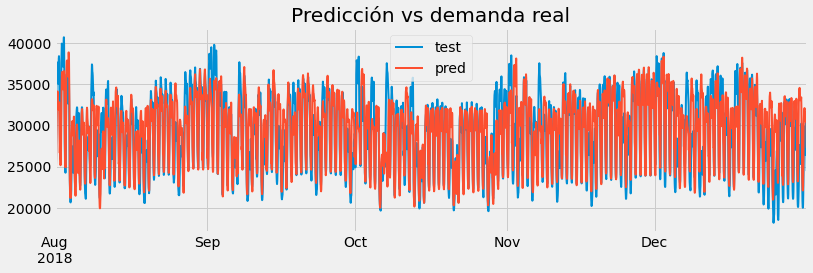

In [13]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 3.5))
datos.loc[predicciones.index, 'total load actual'].plot(ax=ax, linewidth=2, label='test')
predicciones.plot(linewidth=2, label='predicción', ax=ax)
ax.set_title('Predicción vs demanda real')
ax.legend();

In [14]:
# Error backtest
# ==============================================================================
print(f'Error backtest: {metrica}')

Error backtest: 1945.3567160479643


In [15]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor     = XGBRegressor(random_state=123),
                lags          = 24,
             )

# Lags utilizados como predictores
lags_grid = [5, 24, [1, 2, 3, 23, 24, 25, 47, 48, 49]]

# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 5, 10)}

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = datos.loc[:fin_validacion, 'total load actual'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 24,
                        metric      = 'mean_absolute_error',
                        refit       = False,
                        initial_train_size = len(datos[:fin_train]),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                  )

Number of models compared: 30


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [00:55<00:00, 18.54s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3 23 24 25 47 48 49] 
  Parameters: {'alpha': 12915.496650148827}
  Backtesting metric: 1964.5968735412982



In [16]:
# Resultados Grid Search
# ==============================================================================
resultados_grid

,lags,params,metric,alpha
28,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'alpha': 12915.496650148827},1964.596874,12915.496650
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 0.05994842503189409},2001.927219,0.059948
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 0.46415888336127775},2021.518021,0.464159
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 1668.1005372000557},2029.321045,1668.100537
27,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'alpha': 1668.1005372000557},2039.976247,1668.100537
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 3.593813663804626},2050.267898,3.593814
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 12915.496650148827},2051.284423,12915.496650
21,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'alpha': 0.007742636826811269},2094.343981,0.007743
22,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'alpha': 0.05994842503189409},2094.344002,0.059948
20,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'alpha': 0.001},2094.344050,0.001000


In [17]:
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(alpha=12915.496650148827, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=123, reg_alpha=12915.4971,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 
Lags: [ 1  2  3 23 24 25 47 48 49] 
Window size: 49 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2015-01-01 00:00:00+0100', tz='tzoffset(None, 3600)'), Timestamp('2018-07-31 23:00:00+0100', tz='tzoffset(None, 3600)')] 
Training index type: DatetimeIndex 
Training ind

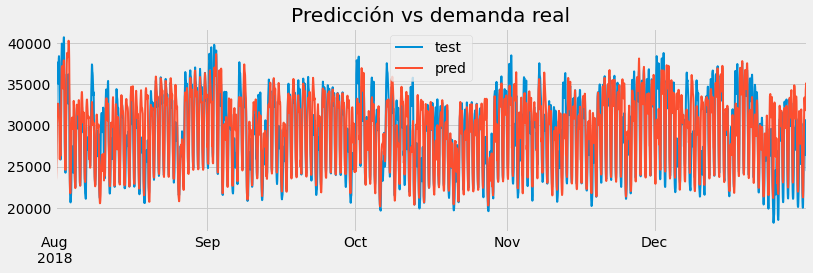

In [18]:
# Backtest modelo final
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = datos['total load actual'],
                            initial_train_size = len(datos[:fin_validacion]),
                            fixed_train_size   = False,
                            steps              = 24,
                            metric             = 'mean_absolute_error',
                            refit              = False,
                            verbose            = False
                        )

fig, ax = plt.subplots(figsize=(12, 3.5))
datos.loc[predicciones.index, 'total load actual'].plot(linewidth=2, label='test', ax=ax)
predicciones.plot(linewidth=2, label='predicción', ax=ax)
ax.set_title('Predicción vs demanda real')
ax.legend();


In [19]:
print(f'Error backtest: {metrica}')


Error backtest: 1871.497458597154


In [20]:
# Backtest del conjunto de test con intervalos de predicción
# ==============================================================================
metric, predicciones = backtesting_forecaster(
                            forecaster          = forecaster,
                            y                   = datos['total load actual'],
                            initial_train_size  = len(datos[:fin_validacion]),
                            fixed_train_size    = False,
                            steps               = 24,
                            metric              = 'mean_absolute_error',
                            interval            = [10, 90],
                            n_boot              = 500,
                            in_sample_residuals = True,
                            verbose             = False
                       )

print('Métrica backtesting:', metric)
predicciones.head(5)

Métrica backtesting: 1871.497458597154


,pred,lower_bound,upper_bound
2018-08-01 00:00:00+01:00,24985.451172,24478.464844,25515.632617
2018-08-01 01:00:00+01:00,23820.939453,22955.683594,24716.447266
2018-08-01 02:00:00+01:00,23239.853516,22141.260742,24387.106836
2018-08-01 03:00:00+01:00,22901.117188,21642.365039,24569.133203
2018-08-01 04:00:00+01:00,23002.941406,21202.569922,25671.032617


In [23]:
# Cobertura del intervalo predicho
# ==============================================================================
dentro_intervalo = np.where(
                     (datos.loc[fin_validacion:, 'total load actual'] >= predicciones['lower_bound']) & \
                     (datos.loc[fin_validacion:, 'total load actual'] <= predicciones['upper_bound']),
                     True,
                     False
                   )

cobertura = dentro_intervalo.mean()
print(f"Cobertura del intervalo predicho: {round(100*cobertura, 2)} %")

Cobertura del intervalo predicho: 78.08 %
